## Trend Olan Youtube Videoları Üzerinde Görüntülenme Sayısı ile Beğeni Sayısı Arasında Bir İlişki Olup Olmadığının Belirlenmesi

In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
import json
import pickle
import six
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import sent_tokenize, word_tokenize
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yunus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yunus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yunus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
ulkeler = [i for i in glob.glob('C:/Users/yunus/Desktop/Python/Veri Seti/*.{}'.format('csv'))]
ulkeler

['C:/Users/yunus/Desktop/Python/Veri Seti\\CAvideos.csv',
 'C:/Users/yunus/Desktop/Python/Veri Seti\\DEvideos.csv',
 'C:/Users/yunus/Desktop/Python/Veri Seti\\FRvideos.csv',
 'C:/Users/yunus/Desktop/Python/Veri Seti\\GBvideos.csv',
 'C:/Users/yunus/Desktop/Python/Veri Seti\\INvideos.csv',
 'C:/Users/yunus/Desktop/Python/Veri Seti\\USvideos.csv']

In [3]:
all_dataframes = []
for csv in ulkeler:
    df = pd.read_csv(csv)
    df['country'] = csv[0:2] 
    all_dataframes.append(df)
all_dataframes[0].head() 

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,C:
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,C:
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,C:
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,C:
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,C:


In [4]:
for df in all_dataframes:
    df['video_id'] = df['video_id'].astype('str') 
    
    df['trending_date'] = df['trending_date'].astype('str') 
    date_pieces = (df['trending_date']
                   .str.split('.')
                  )
    df['Year'] = date_pieces.str[0].astype(int)
    df['Day'] = date_pieces.str[1].astype(int)
    df['Month'] = date_pieces.str[2].astype(int)
    updatedyear = []
    for i in range(len(df)) : 
        y = df.loc[i, "Year"]
        newy = y+2000
        updatedyear.append(newy)
    for i in range(len(df)):
        newy = updatedyear[i]
        tr = df.loc[i, "Year"]
        df['Year'].replace(to_replace = tr, value = newy, inplace=True)
    del df['trending_date']
    df['trending_date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], format = "%Y-%m-%d")
    del df['Year']
    del df['Day']
    del df['Month']
    
    df['title'] = df['title'].astype('str')
    df['channel_title'] = df['channel_title'].astype('str')
    df['category_id'] = df['category_id'].astype(str) 
    
    df['tags'] = df['tags'].astype('str')
    
    
    df['thumbnail_link'] = df['thumbnail_link'].astype('str') 
    
    df['description'] = df['description'].astype('str')
    
    df['comments_disabled'] = df['comments_disabled'].astype('category') 
    df['ratings_disabled'] = df['ratings_disabled'].astype('category') 
    df['video_error_or_removed'] = df['video_error_or_removed'].astype('category') 
    
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

In [5]:
for df in all_dataframes:
    df.insert(4, 'publish_date', df['publish_time'].dt.date)
    df['publish_time'] = df['publish_time'].dt.time

for df in all_dataframes:
     df['publish_date'] = pd.to_datetime(df['publish_date'], format = "%Y-%m-%d")

In [6]:
all_dataframes[1].dtypes

video_id                          object
title                             object
channel_title                     object
category_id                       object
publish_date              datetime64[ns]
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description                       object
country                           object
trending_date             datetime64[ns]
dtype: object

In [7]:
for df in all_dataframes:
    df.set_index('video_id', inplace=True)

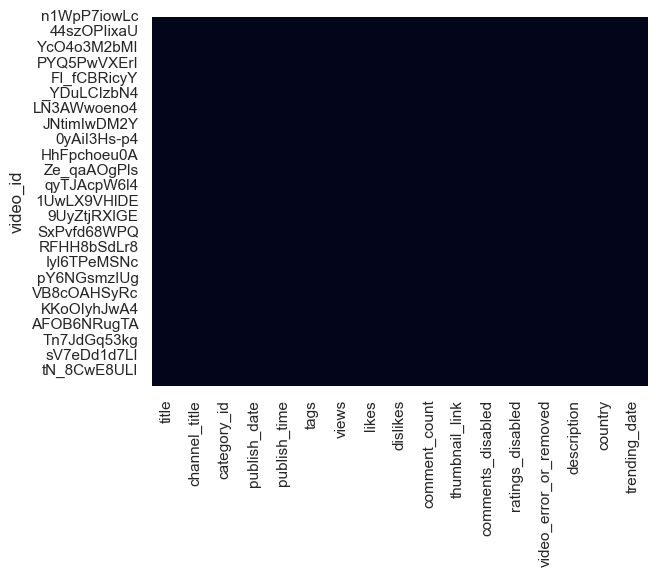

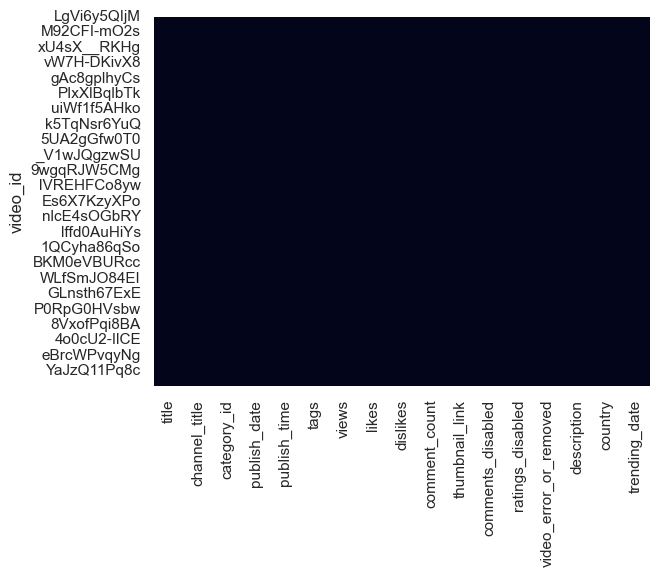

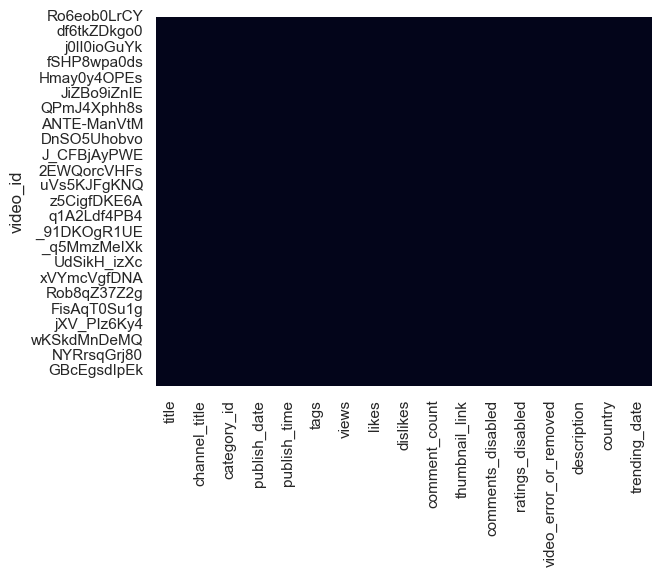

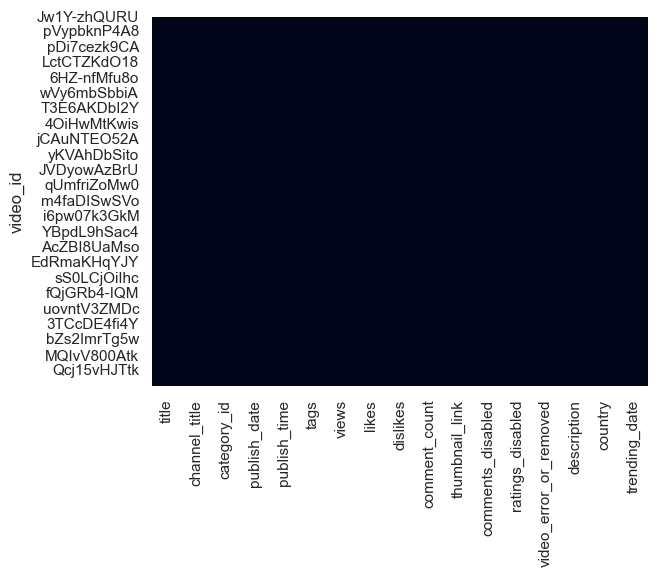

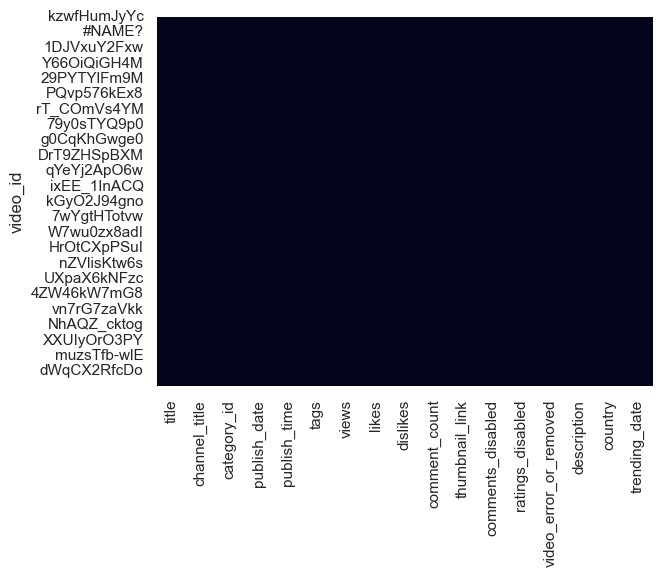

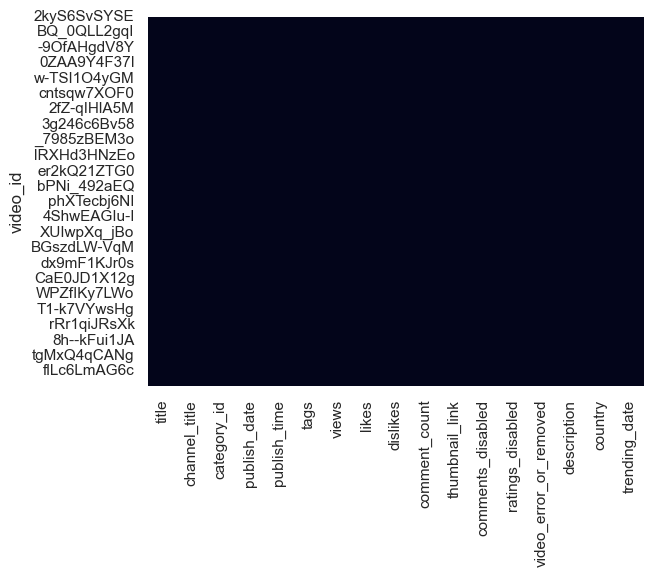

<Figure size 640x480 with 0 Axes>

In [8]:
for df in all_dataframes:
    sns.heatmap(df.isnull(), cbar=False)
    plt.figure()

In [9]:
combined_df = pd.concat(all_dataframes)

In [10]:
backup_df = combined_df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')
combined_df = combined_df.reset_index().sort_values('trending_date', ascending=False).drop_duplicates('video_id',keep='first').set_index('video_id')
for df in all_dataframes:
    df = df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')
combined_df[['publish_date','publish_time','trending_date', 'country']].head()

,publish_date,publish_time,trending_date,country
video_id,,,,
ooyjaVdt-jA,2018-05-17,17:09:38,2018-06-14,C:
GaqzpgATr-g,2018-06-13,15:00:03,2018-06-14,C:
nBfJVvqNoJ0,2018-06-14,00:04:33,2018-06-14,C:
8T22866ElAc,2018-06-13,19:12:53,2018-06-14,C:
VRI44F7HjA8,2018-06-13,21:03:30,2018-06-14,C:


In [11]:

with open('C:/Users/yunus/Desktop/Python/Veri Seti/US_category_id.json', 'r') as f: 
    data = f.read()
obj = json.loads(data)
obj

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [12]:
category_id = {}
with open('C:/Users/yunus/Desktop/Python/Veri Seti/DE_category_id.json', 'r') as f:
    d = json.load(f)
    for category in d['items']:
        category_id[category['id']] = category['snippet']['title']
combined_df.insert(2, 'category', combined_df['category_id'].map(category_id))
backup_df.insert(2, 'category', backup_df['category_id'].map(category_id))
for df in all_dataframes:
    df.insert(2, 'category', df['category_id'].map(category_id))

combined_df.head(3)

,title,channel_title,category,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date
video_id,,,,,,,,,,,,,,,,,,
ooyjaVdt-jA,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,Gaming,20,2018-05-17,17:09:38,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,C:,2018-06-14
GaqzpgATr-g,CETTE INVENTION VA VOUS SURPRENDRE !,e-dison,Entertainment,24,2018-06-13,15:00:03,"inventions|""inventions géniales""|""inventions i...",103265,5249,147,293,https://i.ytimg.com/vi/GaqzpgATr-g/default.jpg,False,False,False,CETTE INVENTION VA VOUS SURPRENDRE !💡 Abonnez-...,C:,2018-06-14
nBfJVvqNoJ0,مسلسل أيوب بطولة مصطفى شعبان – الحلقة الثامنة ...,AlHayah TV Network,Entertainment,24,2018-06-14,00:04:33,"قناة الحياة|""مشاهدة قناة الحياة""|""قناة الحياة ...",1170894,9827,792,1548,https://i.ytimg.com/vi/nBfJVvqNoJ0/default.jpg,False,False,False,تابعونا على فيسبوك وتويتر ..https://www.facebo...,C:,2018-06-14


In [13]:
combined_df['category'].unique()

array(['Gaming', 'Entertainment', 'Comedy', 'Music', 'Film & Animation',
       'News & Politics', 'Sports', 'Education', 'People & Blogs',
       'Howto & Style', 'Autos & Vehicles', 'Pets & Animals',
       'Science & Technology', 'Shows', nan, 'Travel & Events', 'Movies',
       'Trailers'], dtype=object)

<AxesSubplot:xlabel='ratio', ylabel='category'>

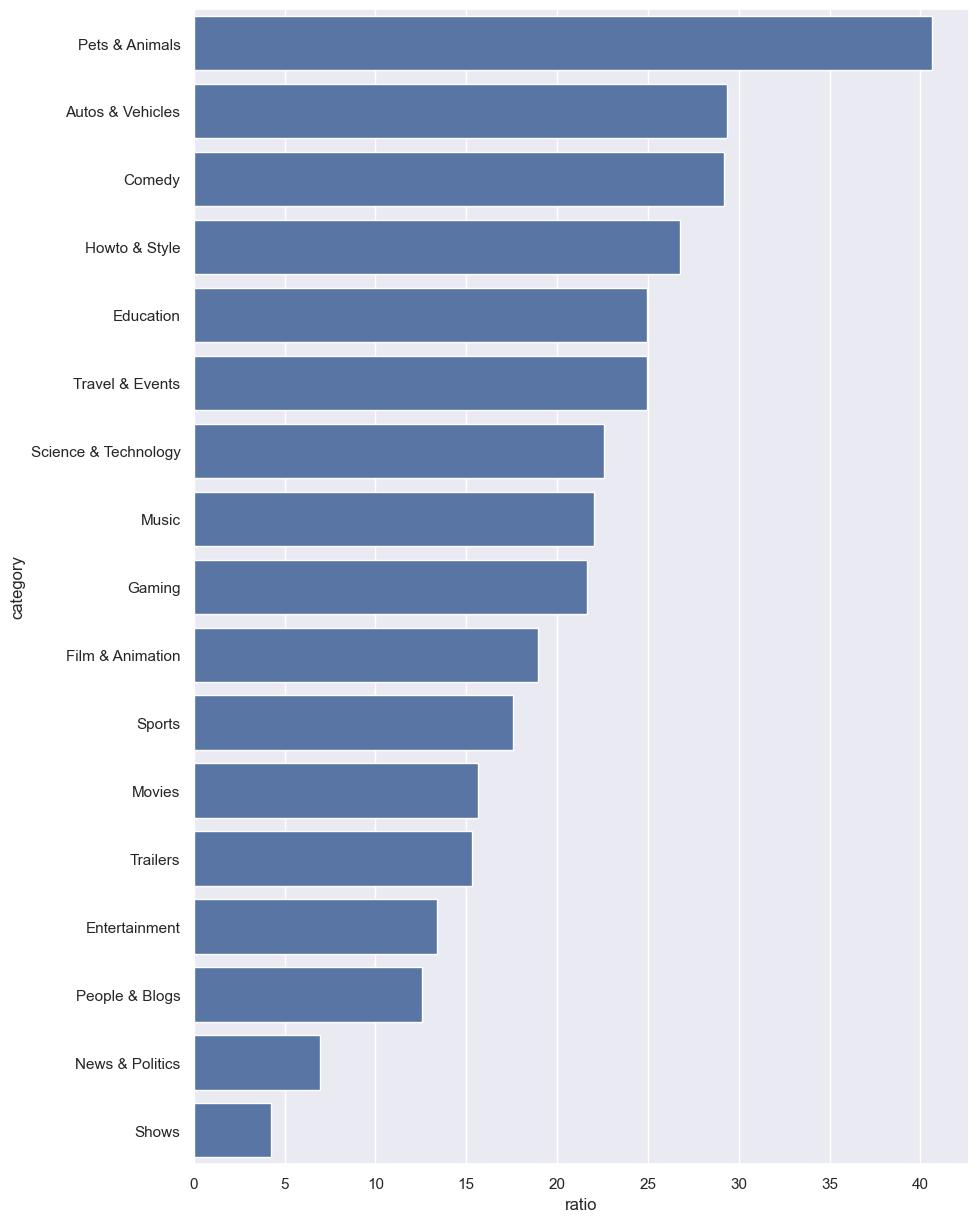

In [14]:
likesdf = combined_df.groupby('category')['likes'].agg('sum')
dislikesdf = combined_df.groupby('category')['dislikes'].agg('sum')
ratiodf = likesdf/dislikesdf 
ratiodf = ratiodf.sort_values(ascending=False).reset_index()
ratiodf.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=ratiodf,
            label="Likes-Dislikes Ratio", color="b")

In [15]:
temporary = [] 
for df in all_dataframes:
    temp = df
    temp = temp.reset_index().sort_values(by = ['likes'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5) 
    temporary.append(temp)

print(temporary[4][['views', 'likes']])
print(temporary[3][['views', 'likes']])

                 views    likes
video_id                       
FlsCjmMhFmw  125432237  2912710
6ZfuNTqbHE8   89930713  2606663
dfnCAmr569k   42019590  1804377
2Vv-BfVoq4g   39082222  1721384
tCXGJQYZ9JA   43738208  1658756
                 views    likes
video_id                       
7C2z4GqqS5E  123010920  5613827
VYOjWnS4cMY  259721696  5444541
xpVfcZ0ZcFM  258164991  4737873
kLpH1nSLJSs  328860380  3823879
ffxKSjUwKdU  208876887  3394437


In [16]:
temp = combined_df
temp = temp.groupby('category')['views', 'likes'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='likes', ascending=False).head()
temp

C:\Users\yunus\AppData\Local\Temp\ipykernel_2784\1729928692.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = temp.groupby('category')['views', 'likes'].apply(lambda x: x.astype(int).sum())


,views,likes
category,,
Music,16929502690,378835372
Entertainment,13517556273,317892063
Comedy,3491476808,164907491
People & Blogs,3409990442,86379649
Howto & Style,1570123156,49128181


In [17]:
col = ['views', 'likes']
corr = combined_df[col].corr()
corr

,views,likes
views,1.000000,0.783281
likes,0.783281,1.000000


# ----------------------

## Machine Learning

## Sentiment Analysis

In [18]:
english = stopwords.words('english')
counter = 0
for words in english:
    print(words)
    counter = counter + 1
    if counter > 10:
        break

i
me
my
myself
we
our
ours
ourselves
you
you're
you've


In [19]:
german = stopwords.words('german')
french = stopwords.words('french')
english.extend(german)
english.extend(french)
stopwords_list = []
for words in english:
    stopwords_list.append(words)

In [20]:
categories = combined_df['category'].unique() 
categories

array(['Gaming', 'Entertainment', 'Comedy', 'Music', 'Film & Animation',
       'News & Politics', 'Sports', 'Education', 'People & Blogs',
       'Howto & Style', 'Autos & Vehicles', 'Pets & Animals',
       'Science & Technology', 'Shows', nan, 'Travel & Events', 'Movies',
       'Trailers'], dtype=object)

In [21]:
def extract_tags(category):
    temp = combined_df[combined_df['category'] == category]
    tags = []
    for t in temp['tags']:
        tags.append(t)
        
    return tags

In [22]:
def clean_tags(tags):
    output = []
    for i in range(len(tags)):
        tags[i] = tags[i].lower()
        tags[i] = re.sub('[^A-Za-z]+', ' ', tags[i])
        tags[i] = tags[i].strip()
        tags[i] = word_tokenize(tags[i]) 
        tags[i] = [w for w in tags[i] if not w in stopwords_list]
        tags[i] = [word for word in tags[i] if len(word) > 2]
        tags[i] = [word for word in tags[i] if not word.isdigit()]
        for w in tags[i]:
            output.append(w)
    return output

In [23]:
all = []
for c in categories:
    tags = extract_tags(c)
    cleaned = clean_tags(tags)
    all.append(cleaned)

In [24]:
def get_polarities(tags):
    max = 2000 
    frequency = nltk.FreqDist(tags)
    temp = pd.DataFrame(frequency.most_common(max),
                    columns=['Word', 'Frequency'])
    compound = .0 
    polarities = []
    for word in temp['Word'].head(max):
        compound += SentimentIntensityAnalyzer().polarity_scores(word)['compound']
        
    return compound

In [25]:
polarities = [] 
for a in all:
    polarity = get_polarities(a)
    polarities.append(polarity)

Text(0.5, 1.0, 'Sentiment Analysis')

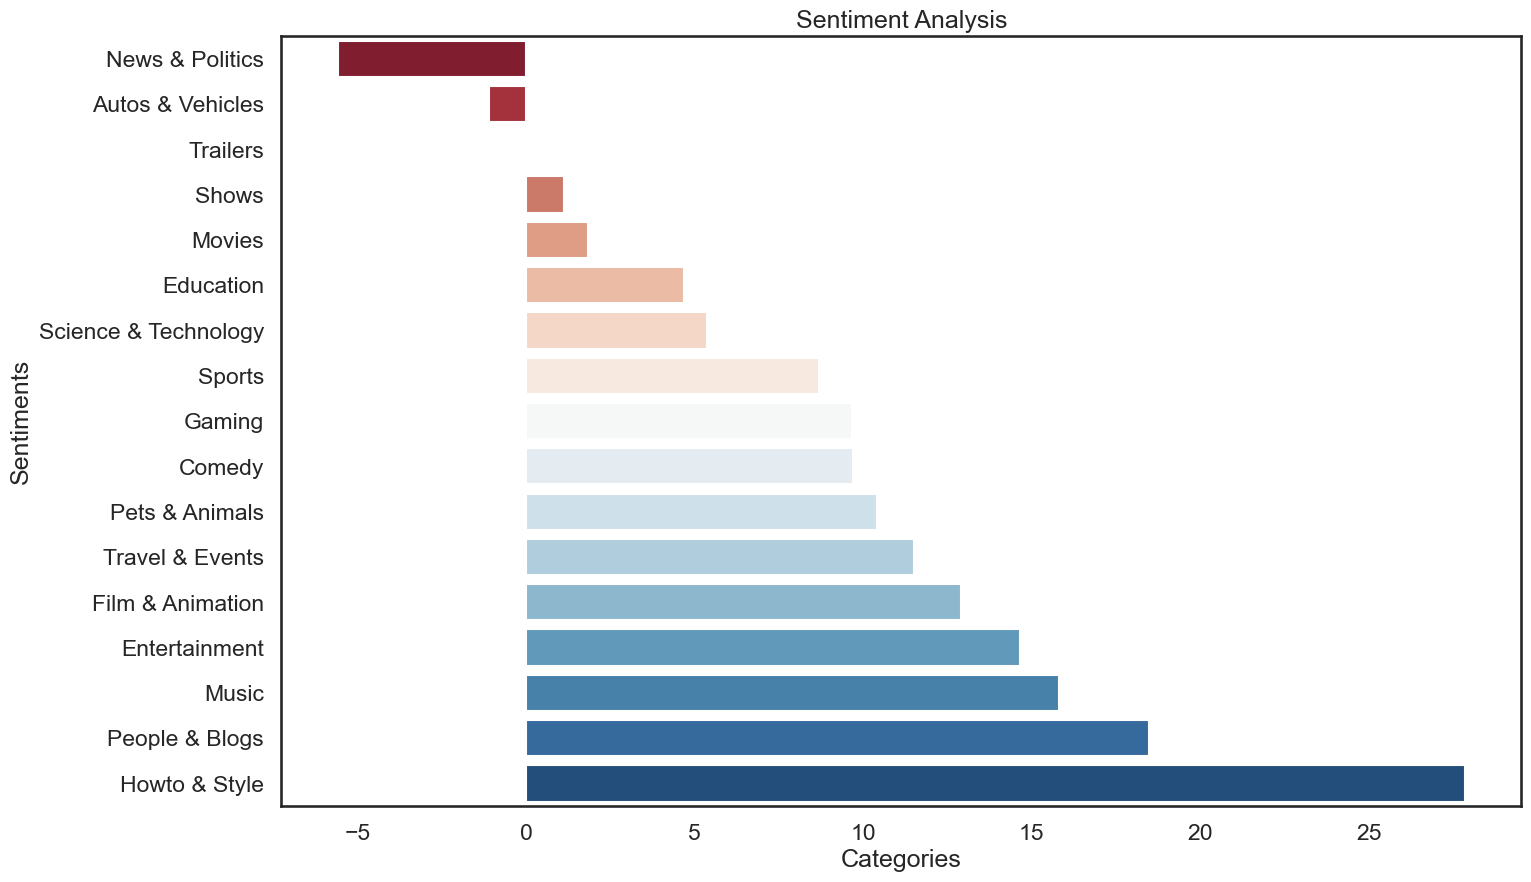

In [26]:
categories = pd.DataFrame(categories)
polarities = pd.DataFrame(polarities)
sentiments = pd.concat([categories, polarities], axis=1)
sentiments.columns = ['category', 'polarity']
sentiments = sentiments.sort_values('polarity').reset_index()
fig = plt.figure(figsize=(16, 10))
sns.set(style="white", context="talk")
ax = sns.barplot(x=sentiments['polarity'], y=sentiments['category'], data=sentiments,orient='h',palette="RdBu")
plt.xlabel("Categories")
plt.ylabel("Sentiments")
plt.title("Sentiment Analysis")

(-0.5, 399.5, 199.5, -0.5)

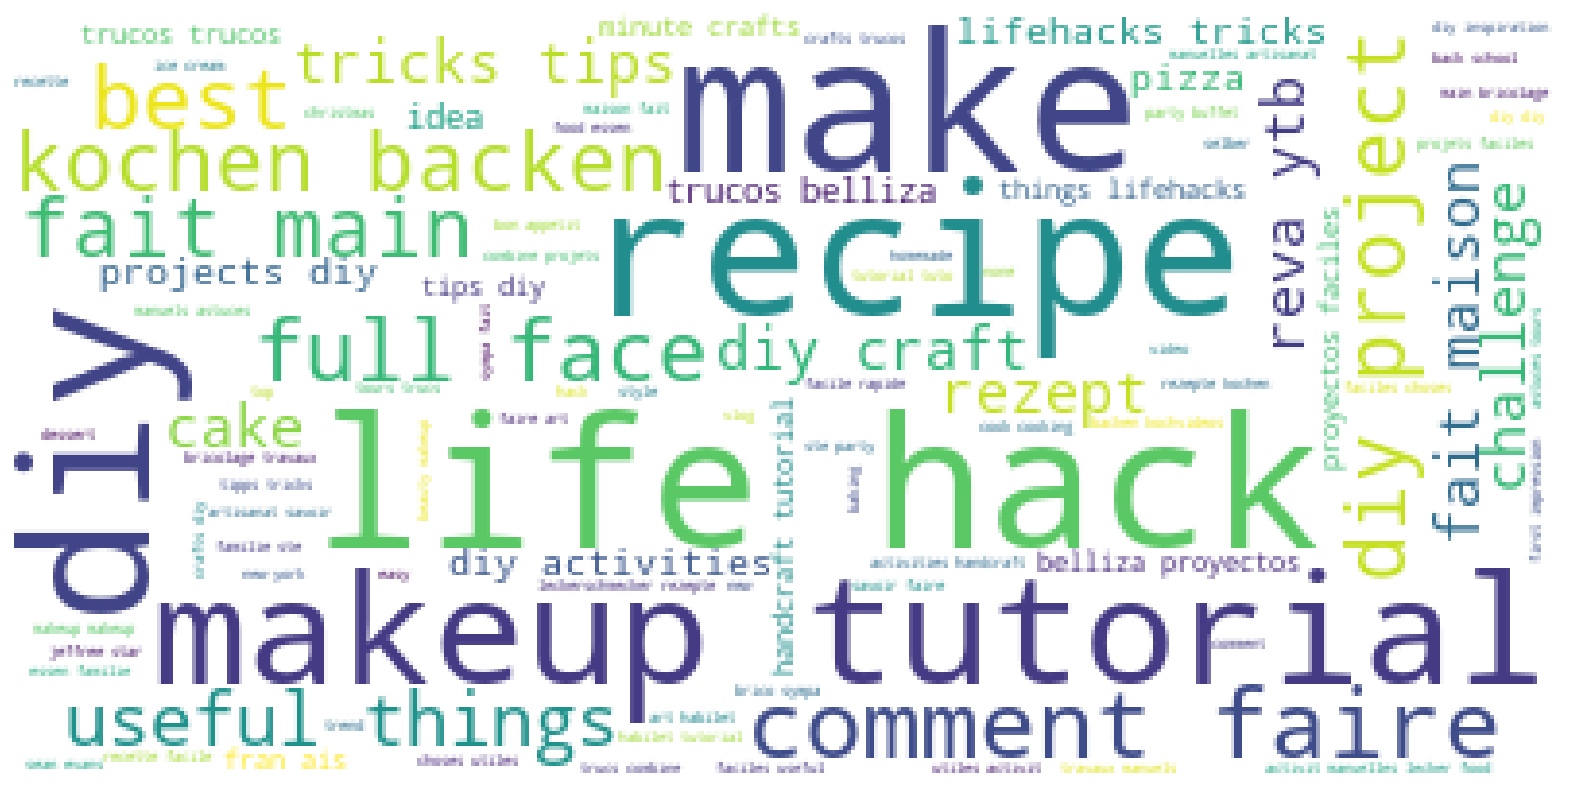

In [27]:
neg = all[9] 
plt.figure(figsize = (20,15))
cloud = WordCloud(background_color = 'white', max_words = 100,  max_font_size = 50)
cloud.generate(' '.join(neg))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

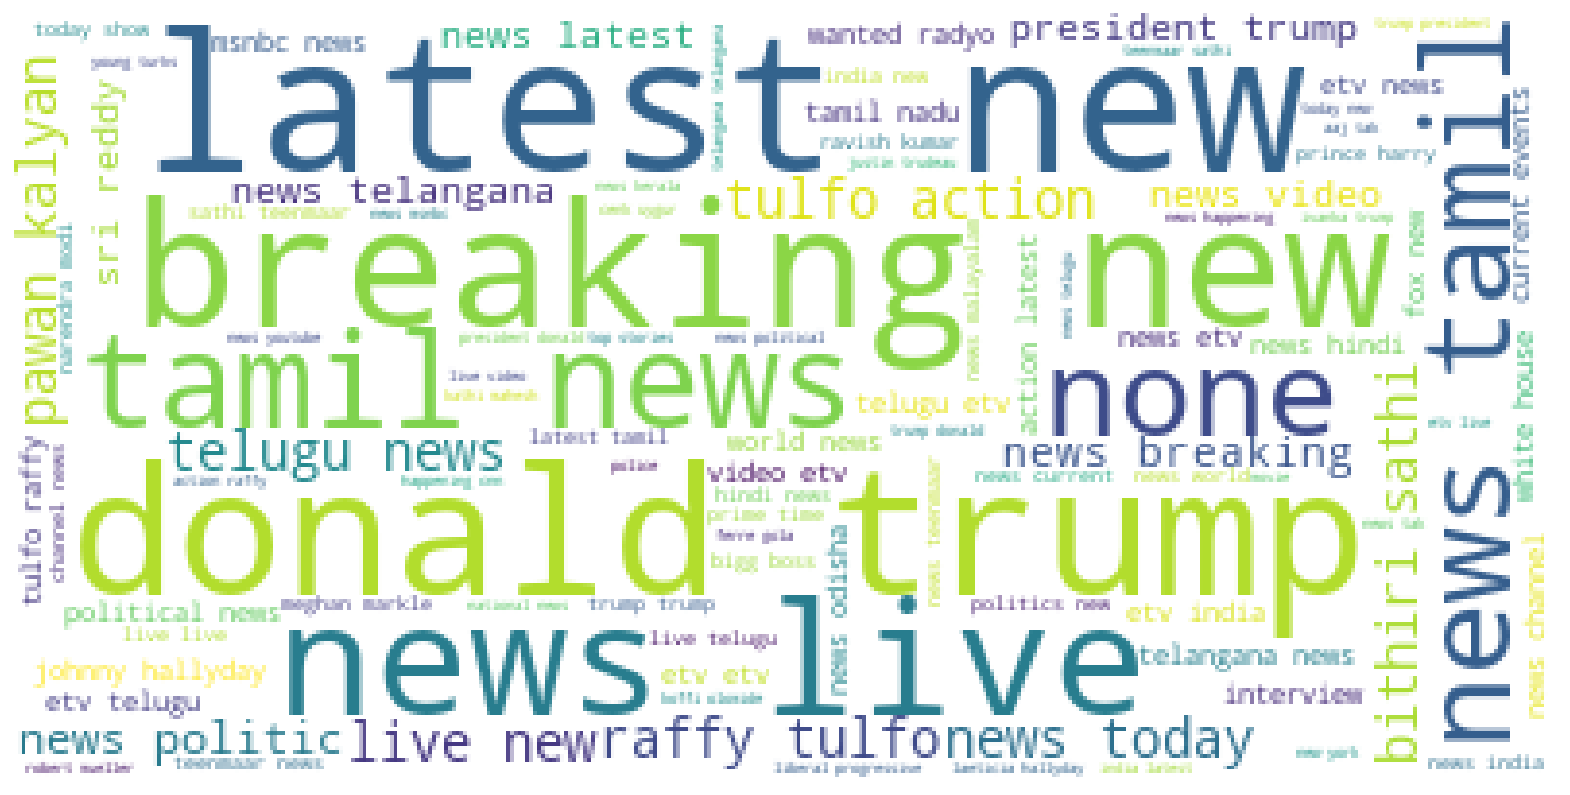

In [28]:
pos = all[5] 
plt.figure(figsize = (20,15))
cloud = WordCloud(background_color = 'white', max_words = 100,  max_font_size = 50)
cloud.generate(' '.join(pos))
plt.imshow(cloud)
plt.axis('off')

## Linear Regression

In [29]:
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
import random
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [30]:
cwd = os.getcwd()
random.seed( 30 )
df = all_dataframes[0]
y = df.views

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [32]:
predictors = ["likes","dislikes"]
x_train = x_train[predictors]
x_test = x_test[predictors]

In [33]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
print(lm.intercept_)
print('regressor coffecient:',lm.coef_)

341546.7386065334
regressor coffecient: [18.07543111 41.09442012]


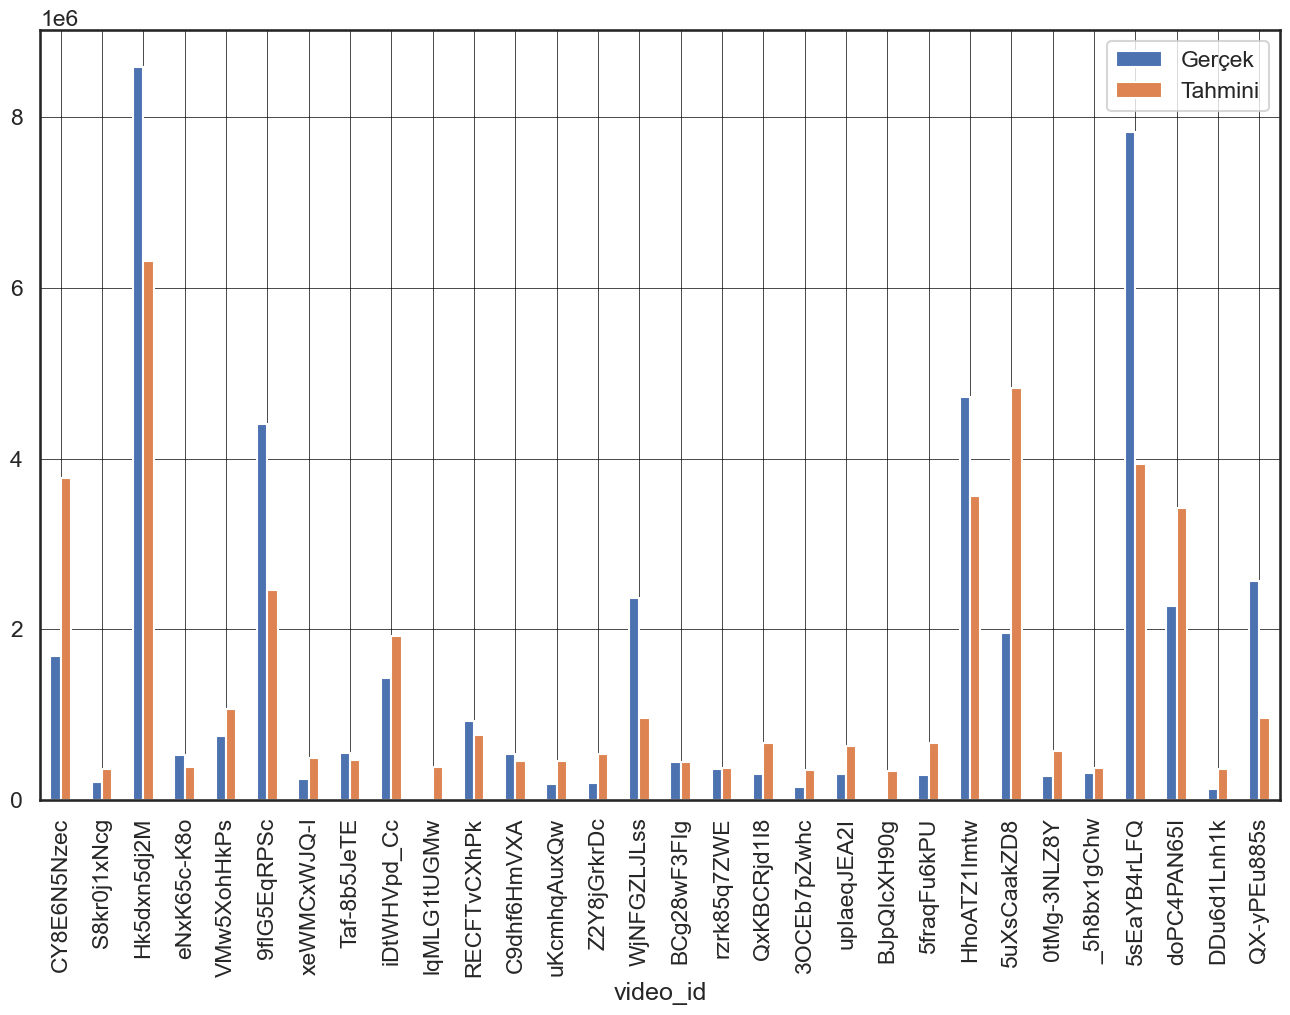

In [34]:
df = pd.DataFrame({'Gerçek': y_test, 'Tahmini': predictions})
df1 = df.head(30)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='yellow')
plt.show()

## Multiple Linear Regression

In [35]:
df = pd.read_csv("C:/Users/yunus/Desktop/Python/Veri Seti/USvideos.csv")

In [36]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [37]:
reg = linear_model.LinearRegression()
reg.fit(df[['likes', 'dislikes']], df['views'])

reg.predict([[20000, 7000], [20000, 9000], [10000, 9000], [10000, 7000]])

C:\Users\yunus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1059546.42864426, 1118428.7978108 ,  860801.48670885,
        801919.11754231])

In [38]:
reg.coef_

array([25.76273111, 29.44118458])

In [39]:
reg.intercept_

338203.51435744506

## Polynomial Regression

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [41]:
temp = combined_df
temp = temp.groupby('category')['views', 'likes'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='likes', ascending=False).head(17)
temp

C:\Users\yunus\AppData\Local\Temp\ipykernel_2784\1049456262.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = temp.groupby('category')['views', 'likes'].apply(lambda x: x.astype(int).sum())


,views,likes
category,,
Music,16929502690,378835372
Entertainment,13517556273,317892063
Comedy,3491476808,164907491
People & Blogs,3409990442,86379649
Howto & Style,1570123156,49128181
Sports,3000395887,47180832
Film & Animation,2519993781,46553576
Gaming,972024188,40247000
Science & Technology,997943767,34513907


<AxesSubplot:xlabel='ratio', ylabel='category'>

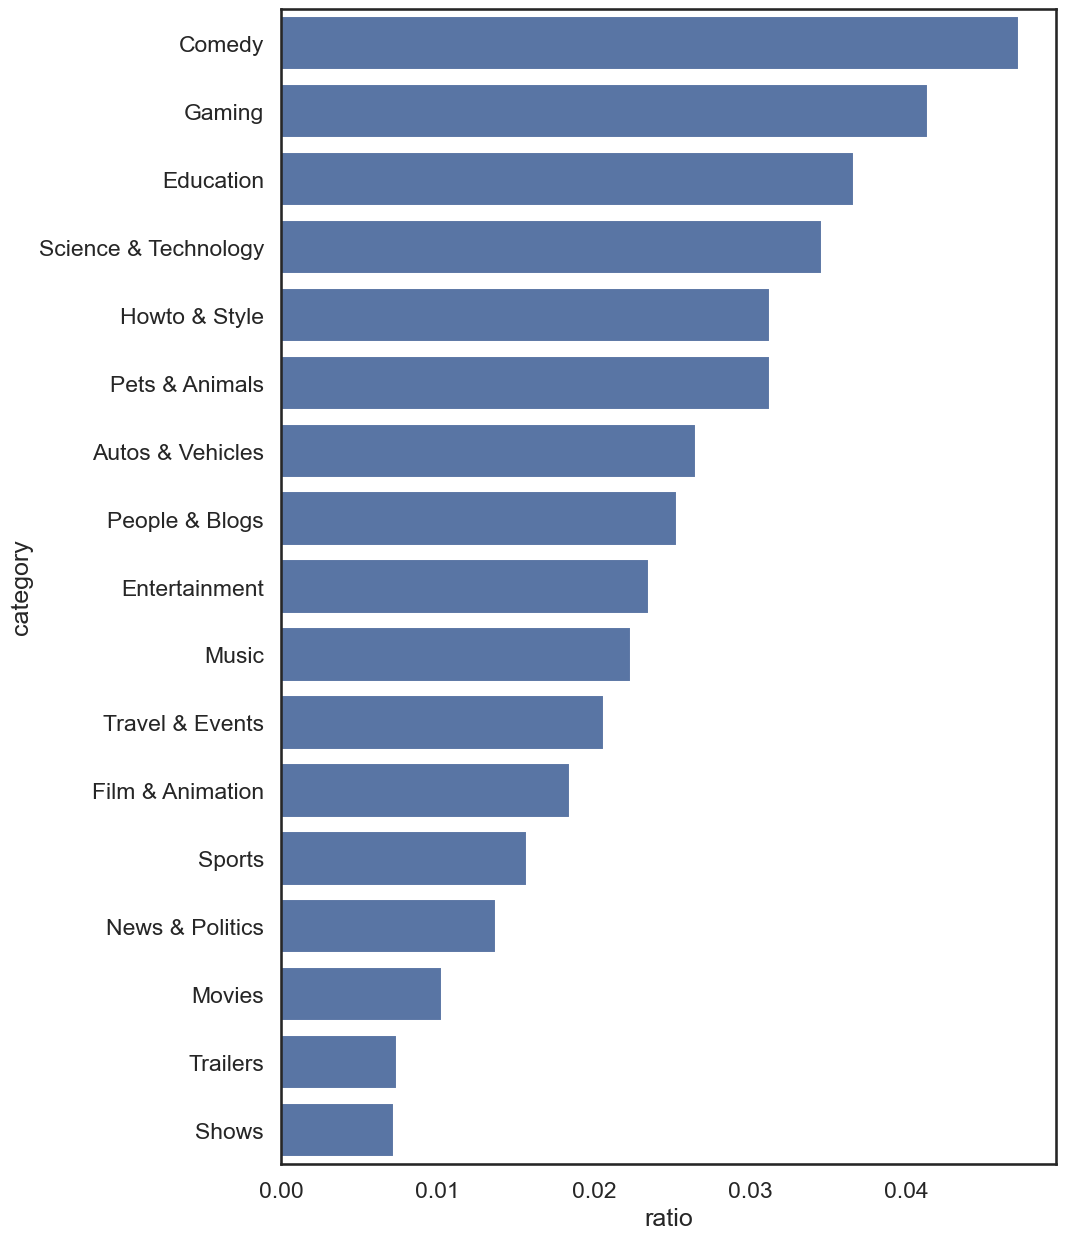

In [42]:
likesdf = combined_df.groupby('category')['likes'].agg('sum')
viewsdf = combined_df.groupby('category')['views'].agg('sum')
ratiodf = likesdf/viewsdf 
ratiodf = ratiodf.sort_values(ascending=False).reset_index()
ratiodf.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=ratiodf,
            label="Likes-Views Ratio", color="b")

In [43]:
df = pd.read_csv("C:/Users/yunus/Desktop/Python/Veri Seti/Veri Seti/polinom.csv")

In [44]:
df

,begeni/izlenme_orani,izlenme
0,0.007,18608
1,0.007,121696194
2,0.010,7953816
3,0.014,2280680744
4,0.016,3000395887
5,0.018,2519993781
6,0.021,140392988
7,0.022,16929502690
8,0.024,13517556273
9,0.025,3409990442


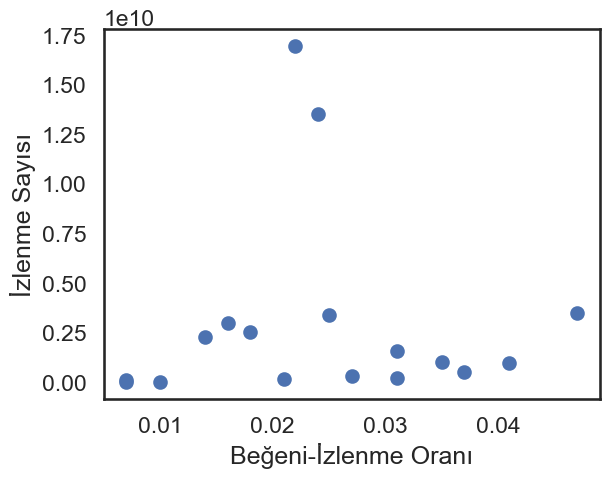

In [45]:
plt.scatter(df['begeni/izlenme_orani'], df['izlenme'])
plt.xlabel('Beğeni-İzlenme Oranı')
plt.ylabel('İzlenme Sayısı')
plt.savefig('1.png', dpi = 100)
plt.show()

In [46]:
polynomial_regression = PolynomialFeatures(degree = 10)
x_polynomial = polynomial_regression.fit_transform(df[['begeni/izlenme_orani']])

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
reg = LinearRegression()
reg.fit(x_polynomial,df['izlenme'])

LinearRegression()

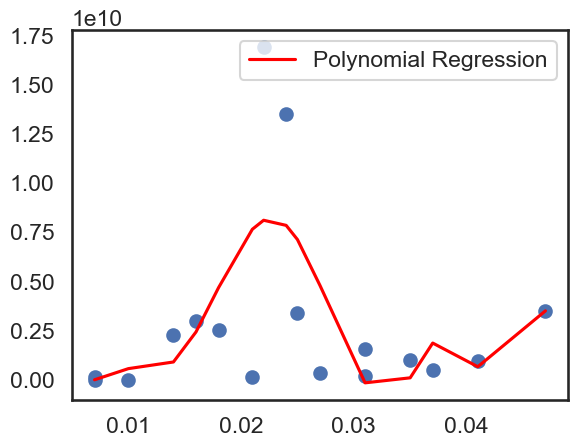

In [48]:
y_head = reg.predict(x_polynomial)
plt.plot(df['begeni/izlenme_orani'],y_head,color= "red",label = "Polynomial Regression")
plt.legend()

plt.scatter(df['begeni/izlenme_orani'],df['izlenme'])   
plt.show()

In [49]:
x_polynomial1 = polynomial_regression.fit_transform([[0.010]])
reg.predict(x_polynomial1)

array([5.70852995e+08])

## K-Nearest Neighbours

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('C:/Users/yunus/Desktop/Python/Veri Seti/Veri Seti/knn.csv')
data

,izlenme,begeni,ulke
0,748374,57527,1
1,2418783,97185,1
2,3191434,146033,1
3,343168,10172,1
4,2095731,132235,1
5,119180,9763,1
6,2103417,15993,1
7,817732,23663,1
8,826059,3543,1
9,256426,12654,1


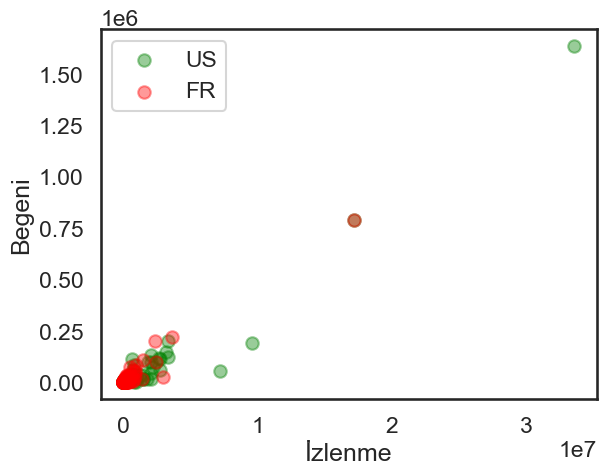

In [51]:
us_veri_seti = data[data.ulke == 1]
fr_veri_seti = data[data.ulke == 0]

plt.scatter(us_veri_seti.izlenme, us_veri_seti.begeni, color = 'green', label ='US', alpha = 0.4)
plt.scatter(fr_veri_seti.izlenme, fr_veri_seti.begeni, color = 'red', label ='FR', alpha = 0.4)
plt.xlabel('İzlenme')
plt.ylabel('Begeni')
plt.legend()
plt.show()

In [52]:
y = data.ulke.values
x_ham_veri = data.drop(['ulke'], axis= 1)

x = (x_ham_veri - np.min(x_ham_veri)) / (np.max(x_ham_veri) - np.min(x_ham_veri))

print("Normalizasyon öncesi veriler:\n")
print(x_ham_veri.head())

print("\n\nNormalizasyon sonrası yapay zekaya eğitim için vereceğimiz veriler:\n")
print(x.head())

Normalizasyon öncesi veriler:

   izlenme  begeni
0   748374   57527
1  2418783   97185
2  3191434  146033
3   343168   10172
4  2095731  132235


Normalizasyon sonrası yapay zekaya eğitim için vereceğimiz veriler:

    izlenme    begeni
0  0.022296  0.035204
1  0.072125  0.059472
2  0.095174  0.089365
3  0.010209  0.006225
4  0.062489  0.080921


C:\Users\yunus\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\yunus\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7, random_state = 1)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("K = 3 için Test verilerimizin doğrulama testi sonucu ", knn.score(x_test, y_test))

K = 3 için Test verilerimizin doğrulama testi sonucu  0.6142857142857143


In [54]:
sayac = 1
for k in range(1, 11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train, y_train)
    print(sayac, " ", "Doğruluk Oranı: %", knn_yeni.score(x_test, y_test) * 100)
    sayac += 1

1   Doğruluk Oranı: % 52.85714285714286
2   Doğruluk Oranı: % 57.14285714285714
3   Doğruluk Oranı: % 61.42857142857143
4   Doğruluk Oranı: % 62.857142857142854
5   Doğruluk Oranı: % 57.85714285714286
6   Doğruluk Oranı: % 54.285714285714285
7   Doğruluk Oranı: % 52.142857142857146
8   Doğruluk Oranı: % 55.714285714285715
9   Doğruluk Oranı: % 53.57142857142857
10   Doğruluk Oranı: % 55.00000000000001


## Deep Learning

## Keras LSTM

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM  
from tensorflow.keras.models import Sequential 
from sklearn.preprocessing import MinMaxScaler

In [56]:
data = pd.read_csv('C:/Users/yunus/Desktop/Python/Veri Seti/Veri Seti/lstm.csv')
data.head()

,izlenme,begeni
0,748374,57527
1,2418783,97185
2,3191434,146033
3,343168,10172
4,2095731,132235


In [57]:
data = data['izlenme']

In [58]:
data = np.array(data).reshape(-1, 1)

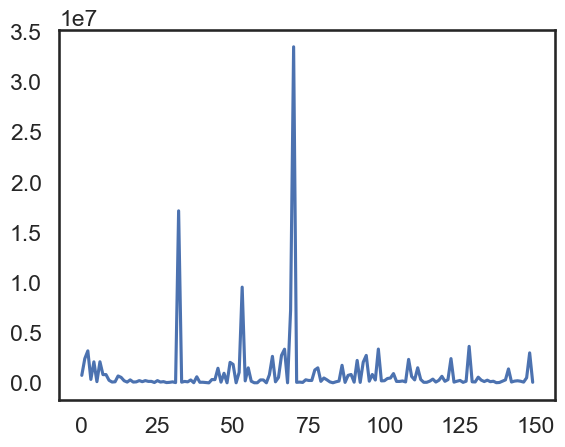

In [59]:
plt.plot(data)
plt.show()

In [60]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [61]:
train = data[0:100,:]
test = data[100:,:]

In [62]:
def get_data(data, steps):      
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a = data[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(data[i+steps, 0])
    return np.array(dataX), np.array(dataY)

In [63]:
steps = 2

In [64]:
X_train, y_train = get_data(train, steps)
X_test, y_test = get_data(test, steps)

In [65]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [66]:
model = Sequential()
model.add(LSTM(128, input_shape = (1, steps))) 
model.add(Dense(64))                                  
model.add(Dense(1))   
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67072     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 75,393
Trainable params: 75,393
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.fit(X_train, y_train, epochs=25, batch_size=1)

Epoch 1/25
97/97 [==============================] - 2s 2ms/step - loss: 0.0148
Epoch 2/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 3/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 4/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 5/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 6/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 7/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 8/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 9/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 10/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 11/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 12/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 13/25
97/97 [==============================

In [69]:
y_pred = model.predict(X_test)

2/2 [==============================] - 1s 0s/step


In [70]:
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

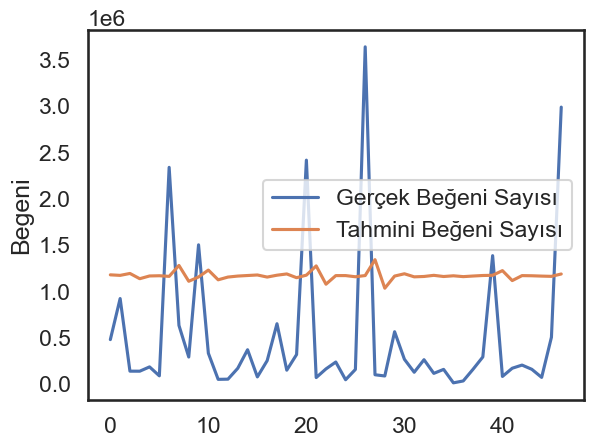

In [71]:
plt.plot(y_test, label = 'Gerçek Beğeni Sayısı')
plt.plot(y_pred, label = 'Tahmini Beğeni Sayısı')
plt.ylabel('İzlenme')
plt.ylabel('Begeni')
plt.legend()
plt.show()

## RNN

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('C:/Users/yunus/Desktop/Python/Veri Seti/Veri Seti/rnn.csv', index_col = 'izlenme')
df.index.freq='MS'

In [74]:
df.head()

,begeni
izlenme,
945,0
4569,7
4732,21
5304,35
6473,52


<AxesSubplot:xlabel='izlenme'>

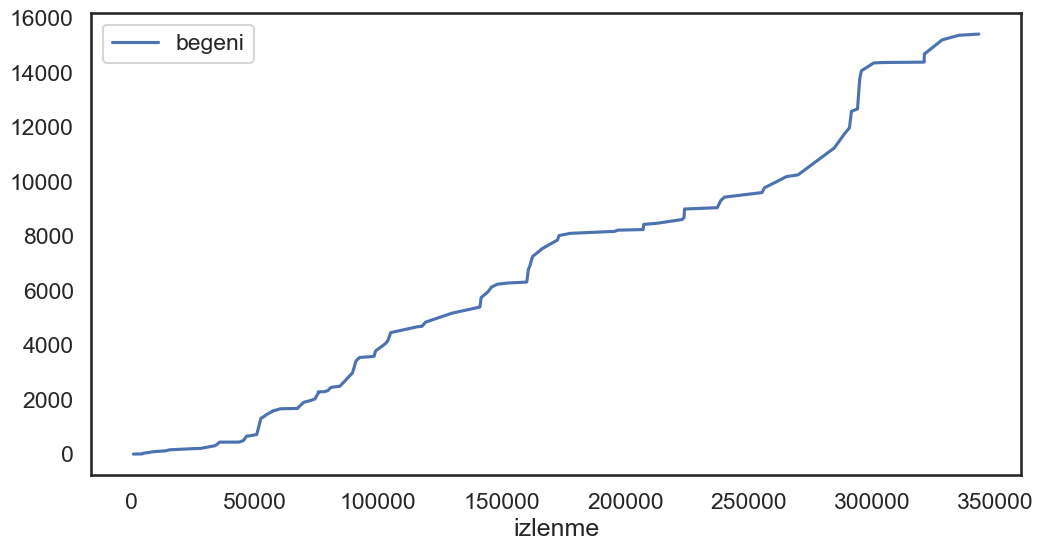

In [75]:
df.plot(figsize=(12,6))

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [77]:
len(df)

100

In [78]:
train = df.iloc[:88]
test = df.iloc[88:]

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [80]:
df.head(),df.tail()

(         begeni
 izlenme        
 945           0
 4569          7
 4732         21
 5304         35
 6473         52,
          begeni
 izlenme        
 321053    14369
 321090    14663
 328330    15186
 335121    15354
 343168    15397)

In [81]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [82]:
scaled_train[:10]

array([[0.        ],
       [0.00059534],
       [0.00178602],
       [0.0029767 ],
       [0.00442252],
       [0.00476271],
       [0.00569825],
       [0.00756931],
       [0.01012077],
       [0.01326756]])

In [83]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [84]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [85]:
X,y = generator[0]
print(f'Verilen dizi: \n{X.flatten()}')
print(f'Tahmin y: \n {y}')

Verilen dizi: 
[0.         0.00059534 0.00178602]
Tahmin y: 
 [[0.0029767]]


In [86]:
X.shape

(1, 3, 1)

In [87]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [88]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [89]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [90]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.fit(generator,epochs=50)

Epoch 1/50
76/76 [==============================] - 2s 4ms/step - loss: 0.0393
Epoch 2/50
76/76 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 3/50
76/76 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 4/50
76/76 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 5/50
76/76 [==============================] - 0s 4ms/step - loss: 6.1687e-04
Epoch 6/50
76/76 [==============================] - 0s 4ms/step - loss: 8.8649e-04
Epoch 7/50
76/76 [==============================] - 0s 4ms/step - loss: 7.2597e-04
Epoch 8/50
76/76 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 9/50
76/76 [==============================] - 0s 4ms/step - loss: 8.0627e-04
Epoch 10/50
76/76 [==============================] - 0s 4ms/step - loss: 8.5707e-04
Epoch 11/50
76/76 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 12/50
76/76 [==============================] - 0s 4ms/step - loss: 7.2034e-04
Epoch 13/50
76/76 [======

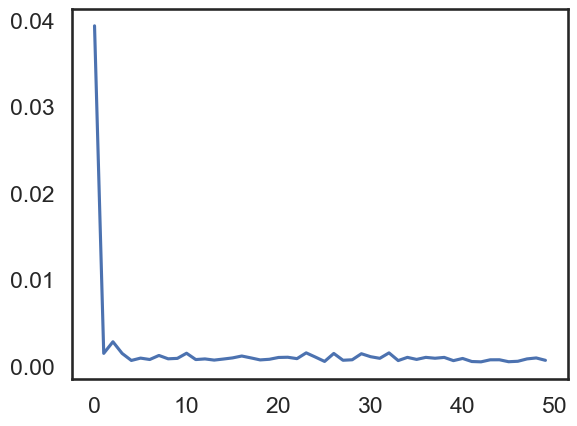

In [92]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [93]:
last_train_batch = scaled_train[-12:]

In [94]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [95]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 169ms/step


array([[0.9612436]], dtype=float32)

In [96]:
scaled_test[0]

array([1.01743494])

In [97]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred) 
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 18ms/step


In [98]:
test_predictions

[array([0.9612436], dtype=float32),
 array([0.98422766], dtype=float32),
 array([1.0058712], dtype=float32),
 array([1.0285265], dtype=float32),
 array([1.0541042], dtype=float32),
 array([1.0809075], dtype=float32),
 array([1.1092362], dtype=float32),
 array([1.1393313], dtype=float32),
 array([1.1713731], dtype=float32),
 array([1.205455], dtype=float32),
 array([1.2421613], dtype=float32),
 array([1.2800934], dtype=float32)]

In [99]:
test.head()

,begeni
izlenme,
290801,11963
291597,12564
294065,12654
294947,13758
295639,14053


In [100]:
true_predictions = scaler.inverse_transform(test_predictions)

In [101]:
test['Tahmini'] = true_predictions

<AxesSubplot:xlabel='izlenme'>

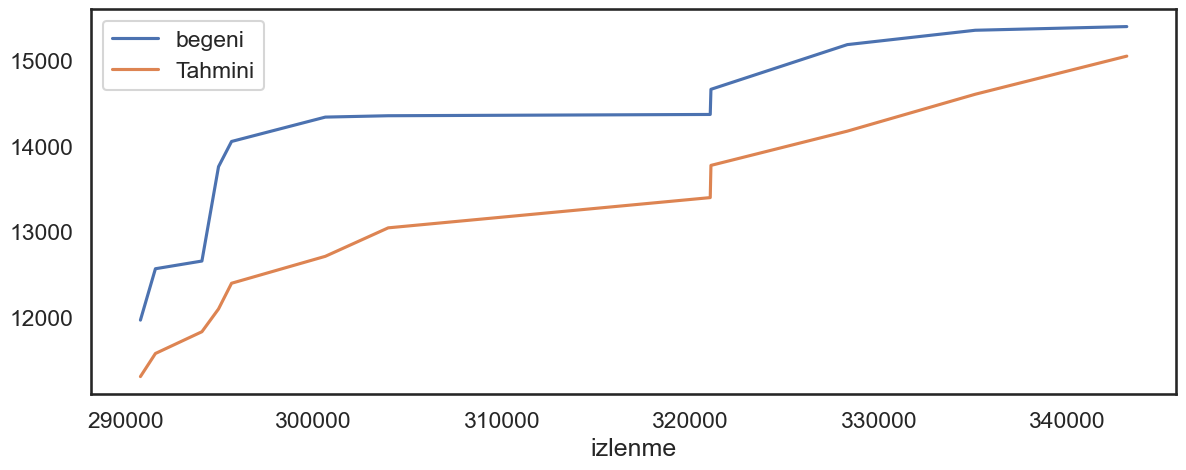

In [102]:
test.plot(figsize=(14,5))

In [103]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['begeni'],test['Tahmini']))
print(rmse)

1134.38213367207


## LSTM

In [104]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [105]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Gerçek izlenme Sayısı')
    plt.plot(predicted, color='blue',label='Tahmini İzlenme Sayısı')
    plt.title('Tahmini İzlenme')
    plt.xlabel('Zaman')
    plt.ylabel('İzlenme Sayısı')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [106]:
dataset = pd.read_csv('C:/Users/yunus/Desktop/Python/Veri Seti/Veri Seti/gru.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,izlenme,begeni
Date,,
2017-01-03,748374,57527
2017-01-11,256782,23542
2017-01-17,435736,39592
2017-02-08,343168,29734
2017-02-15,590615,42354


In [107]:
training_set = dataset[:'2017'].iloc[:,1:2].values
test_set = dataset['2018':].iloc[:,1:2].values

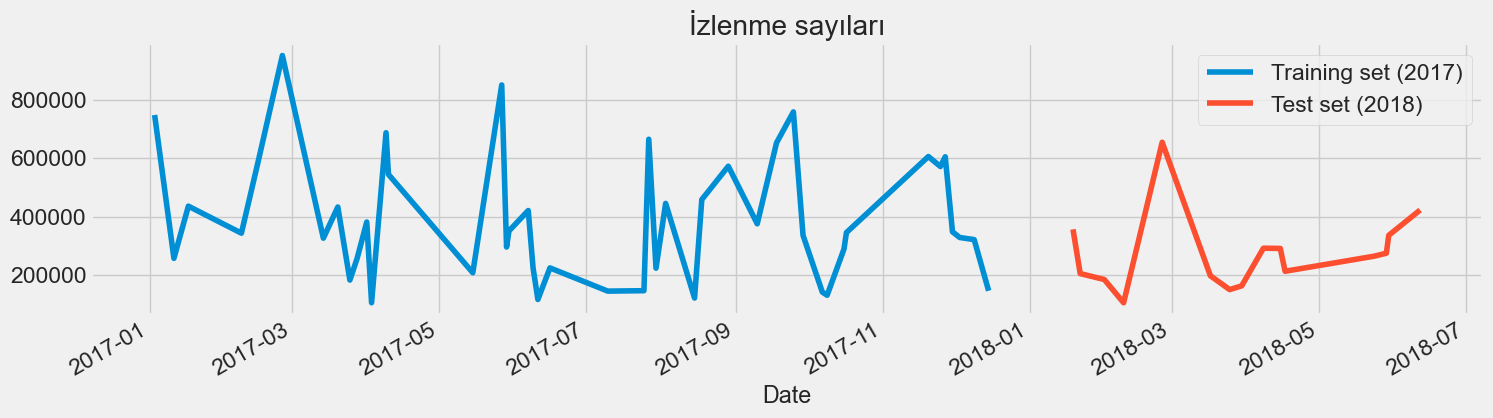

In [108]:
dataset["izlenme"][:'2017'].plot(figsize=(16,4),legend=True)
dataset["izlenme"]['2018':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (2017)','Test set (2018)'])
plt.title('İzlenme sayıları')
plt.show()

In [109]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [110]:
X_train = []
y_train = []
for i in range(1,16):
    X_train.append(training_set_scaled[i-1:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [111]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [112]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
1/1 [==============================] - 8s 8s/step - loss: 0.2223
Epoch 2/50
1/1 [==============================] - 0s 16ms/step - loss: 0.2134
Epoch 3/50
1/1 [==============================] - 0s 8ms/step - loss: 0.2069
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1997
Epoch 5/50
1/1 [==============================] - 0s 22ms/step - loss: 0.1943
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 0.1882
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 0.1826
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1767
Epoch 9/50
1/1 [==============================] - 0s 8ms/step - loss: 0.1723
Epoch 10/50
1/1 [==============================] - 0s 13ms/step - loss: 0.1630
Epoch 11/50
1/1 [==============================] - 0s 8ms/step - loss: 0.1591
Epoch 12/50
1/1 [==============================] - 0s 8ms/step - loss: 0.1526
Epoch 13/50
1/1 [==============================] - 0s 10ms/step - loss:

In [113]:
dataset_total = pd.concat((dataset["izlenme"][:'2017'],dataset["izlenme"]['2018':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [114]:
X_test = []
for i in range(1,16):
    X_test.append(inputs[i-1:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_views = regressor.predict(X_test)
predicted_views = sc.inverse_transform(predicted_views)

1/1 [==============================] - 2s 2s/step


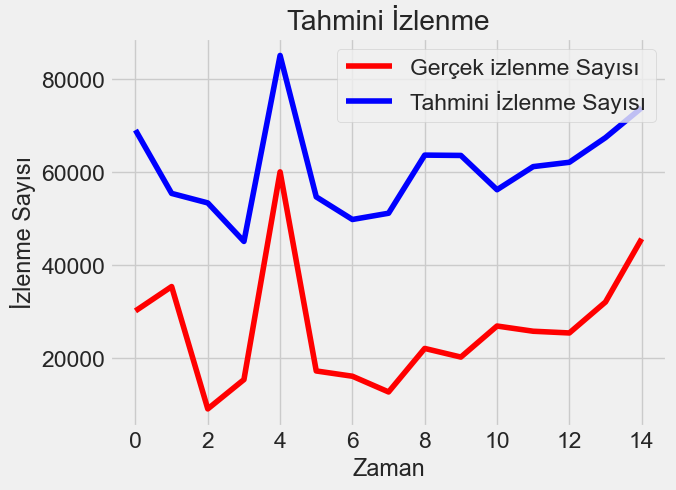

In [115]:
plot_predictions(test_set,predicted_views)

In [116]:
return_rmse(test_set,predicted_views)

The root mean squared error is 35142.90114469481.


# Gated Recurrent Units (GRU)

In [117]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
regressorGRU.add(Dense(units=1))
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50


C:\Users\yunus\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 8s 8s/step - loss: 0.2231
Epoch 2/50
1/1 [==============================] - 0s 17ms/step - loss: 0.2121
Epoch 3/50
1/1 [==============================] - 0s 7ms/step - loss: 0.1939
Epoch 4/50
1/1 [==============================] - 0s 0s/step - loss: 0.1693
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 0.1437
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 0.1204
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0975
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0819
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 0.0726
Epoch 10/50
1/1 [==============================] - 0s 17ms/step - loss: 0.0688
Epoch 11/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0699
Epoch 12/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0718
Epoch 13/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0783
Epoc

In [118]:
X_test = []
for i in range(1,16):
    X_test.append(inputs[i-1:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_views = regressorGRU.predict(X_test)
GRU_predicted_views = sc.inverse_transform(GRU_predicted_views)

1/1 [==============================] - 2s 2s/step


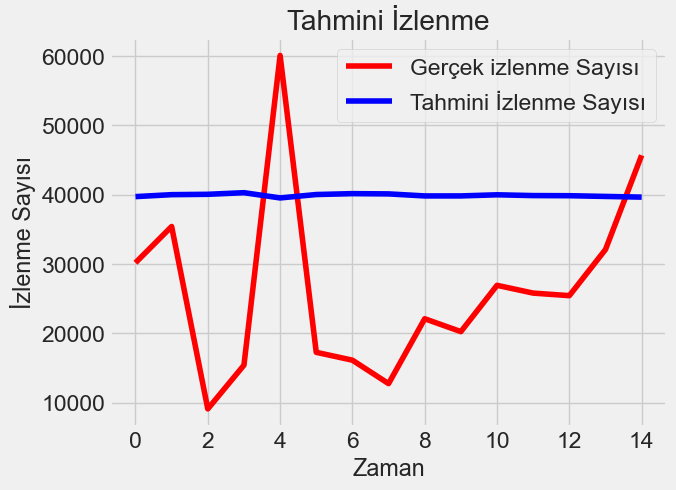

In [119]:
plot_predictions(test_set,GRU_predicted_views)

In [120]:
return_rmse(test_set,GRU_predicted_views)

The root mean squared error is 18844.767836731513.


## Sequence Generation

In [121]:
initial_sequence = X_train[1,:]
sequence = []
for i in range(15):
    new_prediction = regressorGRU.predict(initial_sequence.reshape(initial_sequence.shape[1],initial_sequence.shape[0],1))
    initial_sequence = initial_sequence[1:]
    initial_sequence = np.append(initial_sequence,new_prediction,axis=0)
    sequence.append(new_prediction)
sequence = sc.inverse_transform(np.array(sequence).reshape(15,1))

1/1 [==============================] - 0s 17ms/step


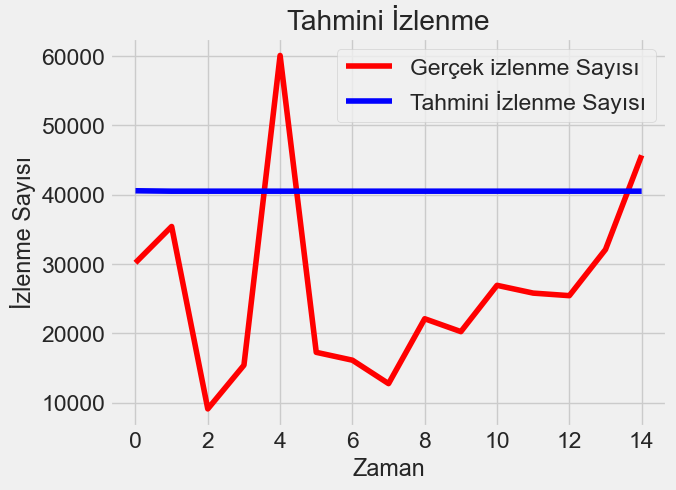

In [122]:
plot_predictions(test_set,sequence)

In [123]:
return_rmse(test_set,sequence)

The root mean squared error is 19175.291303539965.


# ----------------------

## Q Test

In [124]:
liste = {52.142857142857146, 52.85714285714286, 53.57142857142857, 54.285714285714285, 55.00000000000001}
w = 55.0 - 52.14
q = (55.0 - 54.29) / w
if (q < 0.64):
    print(q)

0.2482517482517486


## T Test

In [125]:
import numpy as np
import scipy as scipy
from scipy import stats

In [126]:
data = [19198.26, 19440.26, 39763.48, 1176.00]

In [127]:
stats.ttest_1samp(data, 1176)

Ttest_1sampResult(statistic=2.3743022783716516, pvalue=0.09812154363431416)

In [128]:
1 - stats.t.cdf(2.3743022783716516, 4)

0.03823093636869246

## Z Test 

In [129]:
import statistics

In [130]:
data = [19198.26, 19440.26, 39763.48, 1176.00]

In [131]:
mean = statistics.mean(data)
mean

19894.5

In [132]:
std = statistics.stdev(data)
std

15767.579528953285

In [133]:
z = (1176 - mean) / std
z

-1.1871511391858258